In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [299]:
DF = pd.read_csv('/content/Algerian_forest_fires_dataset_UPDATE.csv')

In [300]:
columns = DF.iloc[0]
DF = DF[1:]
DF.columns = columns

In [301]:
DF

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
1,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
2,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
3,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
4,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
5,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [302]:
DF[DF.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [303]:
DF.drop(123,axis=0,inplace=True)
DF.drop(167,axis = 0,inplace = True)

In [304]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 1 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4    RH          243 non-null    object
 5    Ws          243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
dtypes: object(14)
memory usage: 28.5+ KB


In [305]:
DF.loc[:123,"Region"]=0;
DF.loc[123:,"Region"]=1;

In [306]:
DF["Region"] = DF["Region"].astype(int)

In [307]:
coltodrop = ['day','month','year']
DF.drop(coltodrop,axis=1,inplace=True)

In [308]:
DF.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
1,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
2,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
3,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
4,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
5,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [309]:
DF.columns

Index(['Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes  ', 'Region'],
      dtype='object', name=0)

In [310]:
coltoint =['Temperature', ' RH', ' Ws']
for col in coltoint:
  DF[col]= DF[col].astype(int)

In [311]:
DF['FWI']=DF['FWI'].str.split(" ").str[0]
DF['DC'] = DF['DC'].str.split(".").str[0]

In [312]:
coltofloat =['Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI']
for col in coltofloat:
  DF[col]= DF[col].astype(float)

In [313]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 1 to 245
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int64  
 1    RH          243 non-null    int64  
 2    Ws          243 non-null    int64  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    object 
 11  Region       243 non-null    int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 32.8+ KB


In [314]:
# Check the actual column names in the DataFrame
print(DF.columns)

# Access the 'Classes' column using the correct name (if there was a typo or extra spaces)
# For example, if the column name is 'Classes ':
# DF['Classes ']

# If the column is not found, review the previous data manipulation steps
# to see if it was dropped or renamed.

Index(['Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes  ', 'Region'],
      dtype='object', name=0)


In [315]:
DF['Classes'] = np.where(DF['Classes  '].str.contains("not fire"),0,1)

In [316]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 1 to 245
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int64  
 1    RH          243 non-null    int64  
 2    Ws          243 non-null    int64  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    object 
 11  Region       243 non-null    int64  
 12  Classes      243 non-null    int64  
dtypes: float64(7), int64(5), object(1)
memory usage: 34.7+ KB


In [317]:
DF = DF.drop('Classes  ',axis=1)

In [318]:
x = DF["Classes"].value_counts(normalize=True)*100

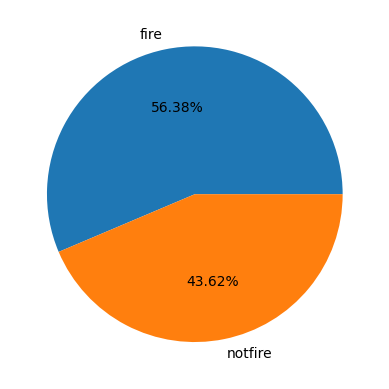

In [319]:
Classlabels = ['fire','notfire']
plt.pie(x,labels=Classlabels,autopct='%1.2f%%')
plt.show()

<Axes: xlabel='0', ylabel='0'>

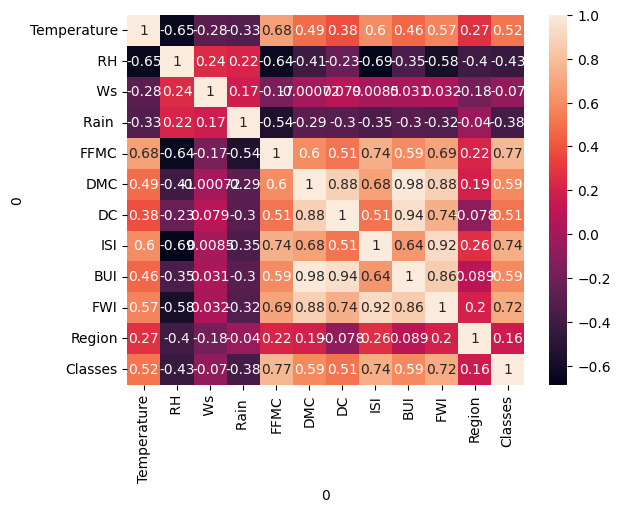

In [320]:
DF.corr()
sns.heatmap(DF.corr(),annot=True)

In [321]:
A = DF['FWI']

In [322]:
def correlationthres(df,threshold):
  colcorr = set()
  corrmatrix = DF.corr()
  for i in range(len(corrmatrix.columns)):
    for j in range(i):
      if abs(corrmatrix.iloc[i,j]) > threshold:
        colname = corrmatrix.columns[i]
        colcorr.add(colname)
  return colcorr

In [323]:
DF_copy = DF.copy()

In [324]:
DF.drop(correlationthres(DF_copy,0.8),axis=1,inplace=True)

<Axes: xlabel='0', ylabel='0'>

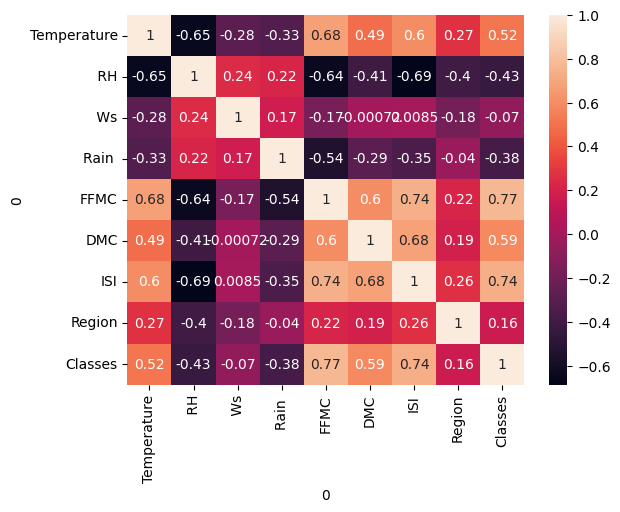

In [325]:
DF.corr()
sns.heatmap(DF.corr(),annot=True)

In [326]:
from sklearn.model_selection import train_test_split

In [327]:
X_Train,X_Test,Y_Train,Y_Test = train_test_split(DF,A,test_size=0.33,random_state=42)

In [328]:
X_Train.shape

(162, 9)

In [329]:
from sklearn.preprocessing import StandardScaler

In [330]:
scaler = StandardScaler()

In [331]:
X_Train = scaler.fit_transform(X_Train)
X_Test = scaler.transform(X_Test)

{'whiskers': [<matplotlib.lines.Line2D at 0x7c4fe436f950>,
 'caps': [<matplotlib.lines.Line2D at 0x7c4fe437ce50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c4fe436ecd0>,
 'medians': [<matplotlib.lines.Line2D at 0x7c4fe437e690>,
 'fliers': [<matplotlib.lines.Line2D at 0x7c4fe437f150>,
 'means': []}

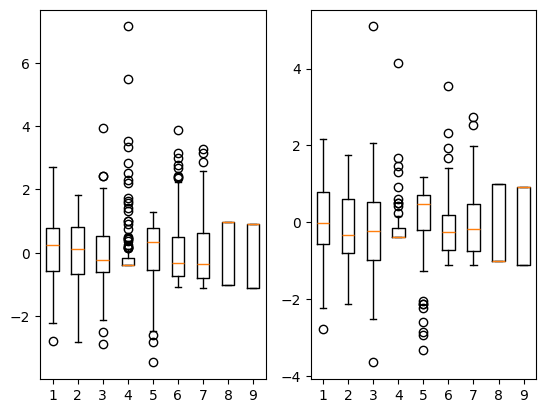

In [332]:
plt.subplot(121)
plt.boxplot(X_Train)
plt.subplot(122)
plt.boxplot(X_Test)

0.6789097213117222
0.9845563190792226


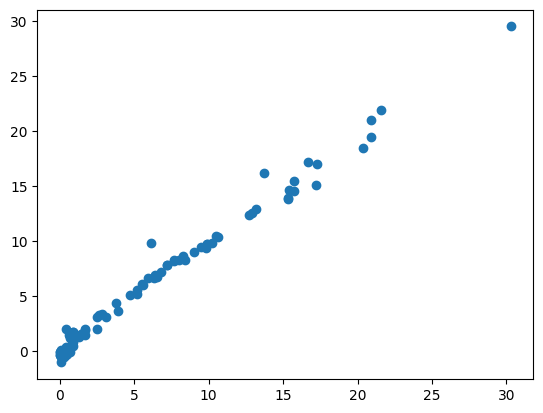

In [333]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
linreg = LinearRegression()
linreg.fit(X_Train,Y_Train)
y_pred = linreg.predict(X_Test)
mae = mean_squared_error(Y_Test,y_pred)
print(mae)
score = r2_score(Y_Test,y_pred)
print(score)
plt.scatter(Y_Test,y_pred)

2.1360242862088668
0.9514102148198663


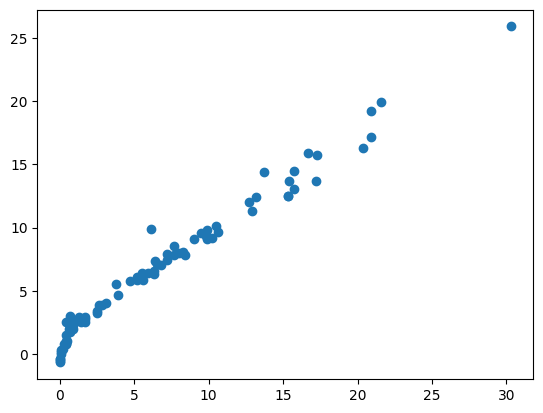

In [334]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score,mean_squared_error
lass = Lasso()
lass.fit(X_Train,Y_Train)
y_pred = lass.predict(X_Test)
mae = mean_squared_error(Y_Test,y_pred)
print(mae)
score = r2_score(Y_Test,y_pred)
print(score)
plt.scatter(Y_Test,y_pred)

In [335]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5,random_state=0)
lassocv.fit(X_Train,Y_Train)

LassoCV(cv=5, random_state=0)

In [336]:
lassocv.alpha_
lassocv.alphas_

array([7.14916122, 6.66733168, 6.21797584, 5.79890508, 5.40807829,
       5.04359191, 4.7036707 , 4.38665903, 4.0910129 , 3.81529232,
       3.55815439, 3.31834669, 3.09470123, 2.88612872, 2.69161331,
       2.51020758, 2.34102799, 2.18325054, 2.03610676, 1.89887998,
       1.77090182, 1.65154897, 1.54024009, 1.43643307, 1.33962229,
       1.24933623, 1.16513515, 1.08660894, 1.01337513, 0.94507704,
       0.88138201, 0.82197981, 0.76658112, 0.71491612, 0.66673317,
       0.62179758, 0.57989051, 0.54080783, 0.50435919, 0.47036707,
       0.4386659 , 0.40910129, 0.38152923, 0.35581544, 0.33183467,
       0.30947012, 0.28861287, 0.26916133, 0.25102076, 0.2341028 ,
       0.21832505, 0.20361068, 0.189888  , 0.17709018, 0.1651549 ,
       0.15402401, 0.14364331, 0.13396223, 0.12493362, 0.11651351,
       0.10866089, 0.10133751, 0.0945077 , 0.0881382 , 0.08219798,
       0.07665811, 0.07149161, 0.06667332, 0.06217976, 0.05798905,
       0.05408078, 0.05043592, 0.04703671, 0.04386659, 0.04091

0.7196411482989664
0.9836297700225622


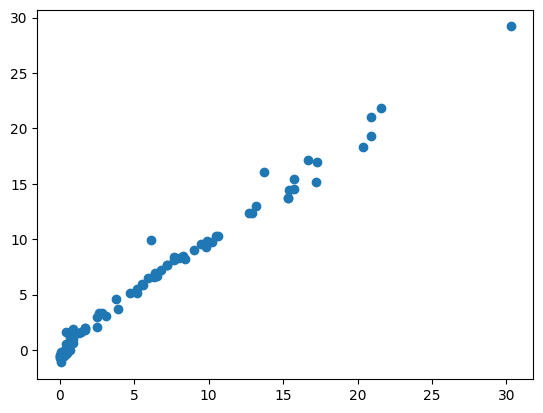

In [337]:
Y_pred = lassocv.predict(X_Test)
plt.scatter(Y_Test,Y_pred)
mae = mean_squared_error(Y_Test,Y_pred)
print(mae)
score = r2_score(Y_Test,Y_pred)
print(score)


0.7052780292329001
0.9839564989246832


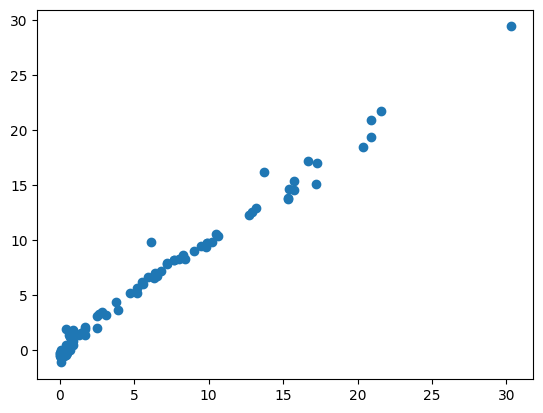

In [338]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score,mean_squared_error
rid = Ridge()
rid.fit(X_Train,Y_Train)
y_pred = rid.predict(X_Test)
mae = mean_squared_error(Y_Test,y_pred)
print(mae)
score = r2_score(Y_Test,y_pred)
print(score)
plt.scatter(Y_Test,y_pred)

0.7052780292329001
0.9839564989246832


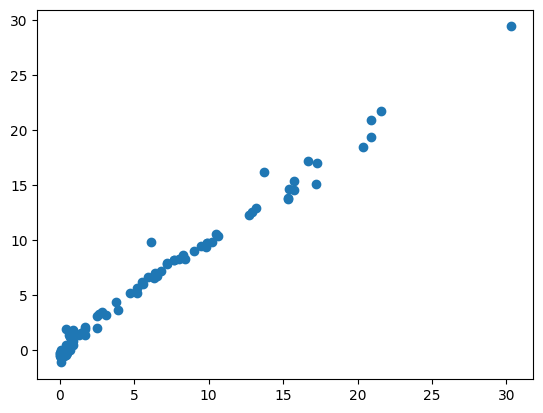

In [339]:
from sklearn.linear_model import RidgeCV
ridcv = RidgeCV(cv=5)
ridcv.fit(X_Train,Y_Train)
Y_pred = ridcv.predict(X_Test)
plt.scatter(Y_Test,Y_pred)
mae = mean_squared_error(Y_Test,Y_pred)
print(mae)
score = r2_score(Y_Test,Y_pred)
print(score)

In [340]:
ridcv.get_params

<bound method BaseEstimator.get_params of RidgeCV(cv=5)>

##pickling the machine learning models,preprocessing the standard scaler

In [341]:
import pickle
pickle.dump(ridcv,open('model.pkl','wb'))
pickle.dump(scaler,open('scaling.pkl','wb'))